## Intro

For this part of the project I will be cleaning and performing exploritory data analysis.

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Import the data
Let's take a look at this dataset to get a feel for it. I can see that the input_voltage values are much smaller than the other two, which means I would need to normalize the data during the preprocessing stage, Additionaly time is a lot bigger then both input_voltage and power"

In [6]:
original_data = pd.read_csv('ex_4.csv')
data = original_data.copy()

In [7]:
data.head(11)

,time,input_voltage,el_power
0,758.425813,3.0,1206.993434
1,759.425109,3.0,1255.072122
2,760.424406,3.0,1203.093254
3,761.423702,3.0,1259.000662
4,762.422998,3.0,1196.033782
5,763.422294,3.0,1253.852871
6,764.421590,3.0,1196.468512
7,765.420886,3.0,1263.617055
8,766.420182,3.0,1196.895799
9,767.419479,3.0,1249.626933


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9795 entries, 0 to 9794
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           9795 non-null   float64
 1   input_voltage  9795 non-null   float64
 2   el_power       9795 non-null   float64
dtypes: float64(3)
memory usage: 229.7 KB


In [9]:
data.describe()

,time,input_voltage,el_power
count,9795.000000,9795.000000,9795.000000
mean,5651.979106,5.548392,1938.575453
std,2825.727015,2.948274,819.978754
min,758.425813,3.000000,1109.522853
25%,3205.202460,3.000000,1223.075977
50%,5651.979106,3.000000,1602.029042
75%,8098.755753,7.500000,2547.339604
max,10545.532399,10.000000,3393.228566


In [10]:
data.shape

(9795, 3)

In [11]:
data.isnull().sum()

time             0
input_voltage    0
el_power         0
dtype: int64

<Axes: >

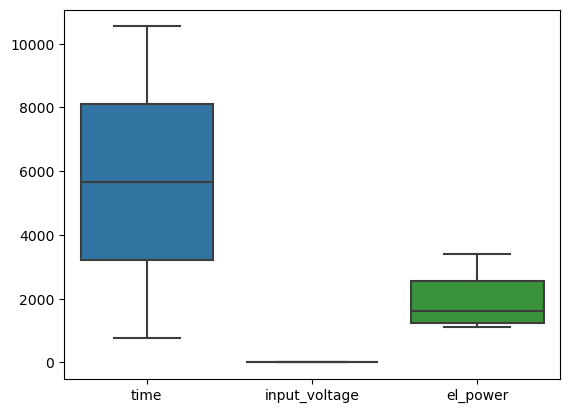

In [12]:
checking_for_outlier = data[['time','input_voltage','el_power']]
sns.boxplot(data = checking_for_outlier)

In [13]:
data = data.rename(columns = {'el_power' : 'power'})
data.head(11)

,time,input_voltage,power
0,758.425813,3.0,1206.993434
1,759.425109,3.0,1255.072122
2,760.424406,3.0,1203.093254
3,761.423702,3.0,1259.000662
4,762.422998,3.0,1196.033782
5,763.422294,3.0,1253.852871
6,764.421590,3.0,1196.468512
7,765.420886,3.0,1263.617055
8,766.420182,3.0,1196.895799
9,767.419479,3.0,1249.626933


<Axes: xlabel='time', ylabel='power'>

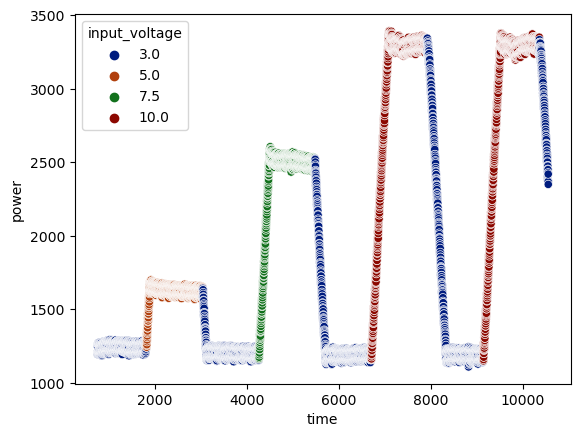

In [14]:
sns.scatterplot(data=data, x='time',y='power',hue='input_voltage',palette='dark')

This scatterplot shows that power exhibits a stepped, non-linear relationship. As time increases, power also increases, while voltage fluctuates. The voltage reaches its minimum when power is decreasing, and higher increases in power correspond to higher voltage. Additionally, power stagnates briefly before starting to decline.

<Axes: >

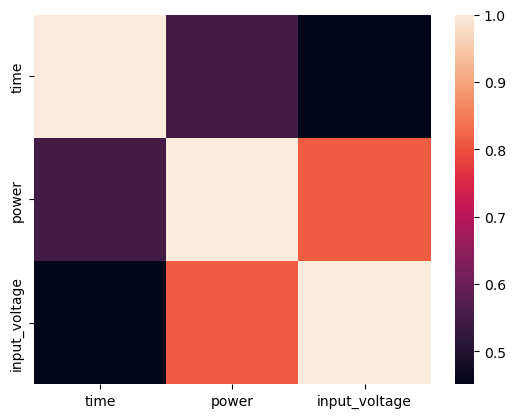

In [16]:
sns.heatmap(data[['time','power','input_voltage']].corr())

The heatmap shows that all the variables have a moderate to strong correlation with each other, except for input_voltage and time.

In [36]:
data.to_csv('cleaned_testt_data.csv')